In [4]:
import tweepy
import textblob

from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make connection to api
consumer_key = "PpCyDbrfESbJI2q80rdqtglGW"
consumer_secret = "9ZSmkXpUFzyjGNjUQNiyZPFvo5DFayeKV9f4w82MtC1l7Tu4LU"
access_token = "922916406877999104-9qjovTSbeNRFbQGmbddAaBCoC1M4Ejr"
access_token_secret = "rmFHAfUbFwbYaNdDTl0KcBpwppTv8Sh5zZ03VNgzuq00t"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [3]:
# extract data from tweets
source = list()
text = list()
date = list()

target_users = ['BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes']

for target_user in target_users:

    public_tweets = api.user_timeline(target_user, count=100)
    for tweet in public_tweets:  
        tweet_data = [target_user, tweet['text'], tweet['created_at']]
        source.append(target_user)
        text.append(tweet['text'])
        date.append(tweet['created_at'])


In [4]:
# put data into dataframe
df = pd.DataFrame(np.column_stack([source, text, date]), 
                               columns=['source', 'text', 'date'])
df.head()
df['date'] = pd.to_datetime(df['date'])

In [5]:
# sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

neutral = list()
negative = list()
positive = list()
compound= list()
for sentence in df['text']:
    vs = analyzer.polarity_scores(sentence)
    neutral.append(vs['neu'])
    negative.append(vs['neg'])
    positive.append(vs['pos'])
    compound.append(vs['compound'])

df['neutral score'] = neutral
df['negative score'] = negative
df['positive score'] = positive
df['compound score'] = compound

df.head()


,source,text,date,neutral score,negative score,positive score,compound score
0,BBC,🤰 A doctor explains why you can get pregnant a...,2018-03-18 15:41:04,1.000,0.0,0.000,0.0000
1,BBC,RT @BBCEngland: A number of runners have held ...,2018-03-18 14:33:07,0.947,0.0,0.053,0.0772
2,BBC,RT @BBCSport: They’ve done it! Gold for GB’s M...,2018-03-18 14:28:23,1.000,0.0,0.000,0.0000
3,BBC,📱🚗 Why a rise in electric cars could also mean...,2018-03-18 14:18:01,1.000,0.0,0.000,0.0000
4,BBC,RT @BBC6Music: ✏️ Which song has the greatest ...,2018-03-18 14:08:37,0.682,0.0,0.318,0.6369


In [ ]:
# write data to csv
df.to_csv("NewsMood.csv")

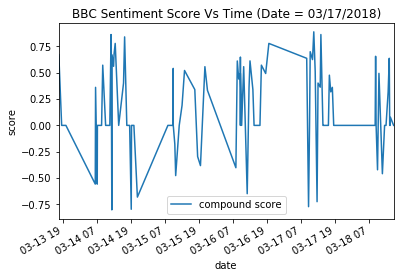

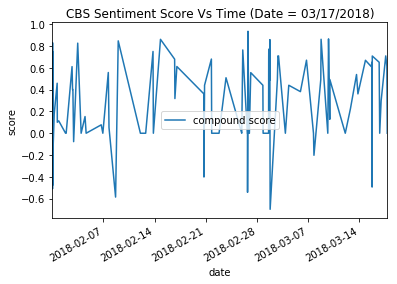

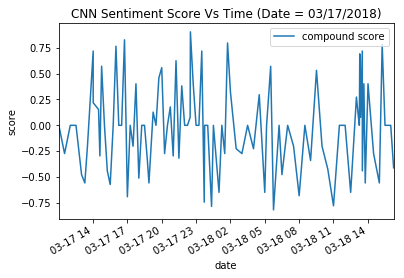

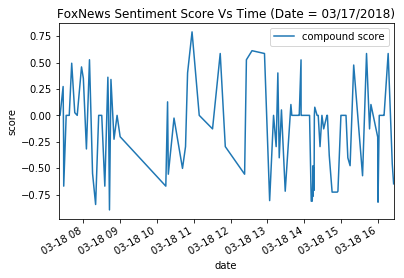

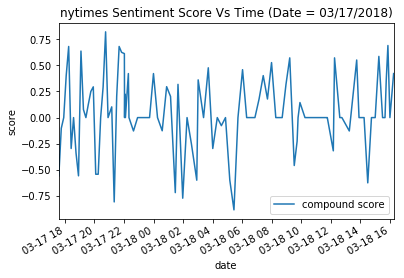

In [7]:
# first plot

for target_user in target_users:
    filtered_df = df.loc[df['source'] == target_user]
    filtered_df.plot(x='date', y='compound score')
    plt.title(target_user + ' Sentiment Score Vs Time (Date = 03/17/2018)')
    plt.xlabel('date')
    plt.ylabel('score')
    
    plt.savefig(target_user + 'CompoundScorevsTime.png')
    plt.show()

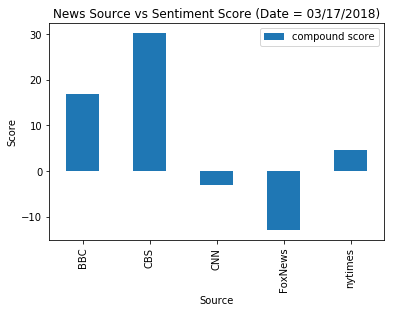

In [15]:
# second plot
aggregated_scores = df.groupby(source).sum()
aggregated_scores.plot(x=aggregated_scores.index, y='compound score', kind='bar')

plt.title('News Source vs Sentiment Score (Date = 03/17/2018)')
plt.xlabel('Source')
plt.ylabel('Score')
plt.savefig('AggregateScores.png')
plt.show()

### Three Observations
#### 1) 
#### 2) 
#### 3) 